# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Data

In [2]:
books = pd.read_csv('BX-Books.csv', sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

C:\Users\ahmed_3hijq3m\AppData\Local\Temp\ipykernel_11676\2987874911.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-Books.csv', sep=';', encoding='ISO-8859-1', on_bad_lines='skip')


In [3]:
users = pd.read_csv('BX-Users.csv', sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='ISO-8859-1', on_bad_lines='skip')


# Data Cleaning

In [5]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Books

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.rename(columns={'Book-Title': 'title', 
                      'Book-Author': 'author', 
                      'Year-Of-Publication': 'publish_year', 
                      'Publisher': 'publisher',
                      'Image-URL-L': 'image_url'}, 
                      inplace=True)

In [8]:
books.isnull().sum()

ISBN            0
title           0
author          2
publish_year    0
publisher       2
Image-URL-S     0
Image-URL-M     0
image_url       3
dtype: int64

In [9]:
books.fillna({'author': '', 
              'publisher': '', 
              'image_url': ''}, 
              inplace=True)
books.isnull().sum()

ISBN            0
title           0
author          0
publish_year    0
publisher       0
Image-URL-S     0
Image-URL-M     0
image_url       0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
books.drop(columns=['Image-URL-S', 'Image-URL-M'], inplace=True)

### Users

In [12]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users.rename(columns={'User-ID': 'user_id', 
                      'Location': 'location', 
                      'Age': 'age'}, 
                      inplace=True)

In [14]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [15]:
users.duplicated().sum()

0

### Ratings

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings.rename(columns={'User-ID': 'user_id', 
                        'Book-Rating': 'rating'}, 
                        inplace=True)

In [18]:
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [19]:
ratings.duplicated().sum()

0

In [20]:
ratings.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

In [21]:
ratings.head(10)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [22]:
ratings.shape

(1149780, 3)

In [23]:
# users rated less than 10
user_rating_counts = ratings['user_id'].value_counts()
user_rating_counts[user_rating_counts < 10].shape

(92186,)

In [24]:
# keep users with 10 or more ratings
users_with_10_or_more = user_rating_counts[user_rating_counts >= 10].index
ratings = ratings[ratings['user_id'].isin(users_with_10_or_more)]
ratings.shape

(965713, 3)

### Merged Data

In [25]:
df = pd.merge(ratings, books, on='ISBN', how='inner')
df.shape

(877129, 8)

In [26]:
df.head(2)

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
1,276762,0380000059,0,CLOUT,D. GIBBONS,2024,Avon,http://images.amazon.com/images/P/0380000059.0...


In [27]:
df.title.nunique()

224118

In [28]:
# books with less than 10 ratings
book_rating_counts = df['ISBN'].value_counts()
book_rating_counts[book_rating_counts < 10].shape

(235904,)

In [29]:
# remove books with less than 10 books
books_with_10_or_more = book_rating_counts[book_rating_counts >= 10].index
df = df[df['ISBN'].isin(books_with_10_or_more)]
df.shape

(409439, 8)

In [30]:
df.head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
2,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon,http://images.amazon.com/images/P/0380711524.0...
3,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...
31,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...
44,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...


In [31]:
df.reset_index(drop=True, inplace=True)
df.head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
1,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon,http://images.amazon.com/images/P/0380711524.0...
2,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...
3,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...
4,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...


# EDA

In [32]:
print('Num of Users: ', df['user_id'].nunique())
print('Num of Books: ', df['title'].nunique())

Num of Users:  12490
Num of Books:  13150


In [33]:
df['rating'].describe()

count    409439.000000
mean          2.606462
std           3.808343
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: rating, dtype: float64

In [34]:
df['publisher'].value_counts()

publisher
Ballantine Books            21221
Pocket                      20014
Berkley Publishing Group    18830
Warner Books                15719
Bantam                      13543
                            ...  
V. Hamy                        10
Adams Media Corp               10
Du Palemon                     10
Mondadori (IT)                 10
Wunderlich im Rowohlt          10
Name: count, Length: 869, dtype: int64

In [35]:
df['author'].value_counts()

author
Stephen King            7502
Nora Roberts            7071
James Patterson         4536
John Grisham            4368
Mary Higgins Clark      3673
                        ... 
Donna Morrissey           10
Paul Watzlawick           10
Tschingis Aitmatow        10
Richard Bohringer         10
Ildiko von KÃ?Â¼rthy      10
Name: count, Length: 4719, dtype: int64

In [36]:
df['publish_year'].value_counts().sort_index()

publish_year
0        3118
1920       29
1927       17
1929       12
1930       37
        ...  
2002    43181
2003    35014
2004    11560
2005       51
2030       10
Name: count, Length: 66, dtype: int64

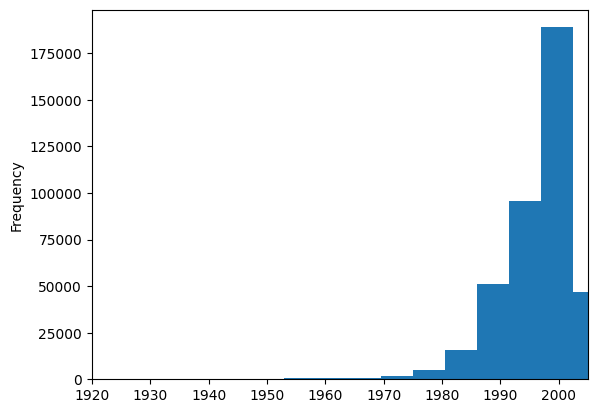

In [37]:
df[df['publish_year']!=0]['publish_year'].plot(kind='hist', bins=20)
plt.xlim(1920, 2005)
plt.show()

# Data Preprocessing

### df

In [38]:
df.head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
1,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon,http://images.amazon.com/images/P/0380711524.0...
2,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...
3,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...
4,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...


In [39]:
book_mean_ratings = df.groupby('ISBN')['rating'].transform('mean')
df['book_rating'] = book_mean_ratings
df.head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url,book_rating
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,2.461538
1,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon,http://images.amazon.com/images/P/0380711524.0...,2.511628
2,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,3.393939
3,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111
4,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,3.630952


In [40]:
# the book has 2 versions, each has its own rating
df[df['title'] == 'Harry Potter and the Goblet of Fire (Book 4)'].head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url,book_rating
1382,278356,0439139600,10,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,4.884146
2562,254,0439139597,9,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.564103
3694,1903,0439139597,0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.564103
3800,2033,0439139597,9,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.564103
4528,2793,0439139600,0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,4.884146


In [41]:
book_num_ratings = df.groupby('ISBN')['rating'].transform('count')
df['num_ratings'] = book_num_ratings
df.head()

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url,book_rating,num_ratings
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,2.461538,13
1,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon,http://images.amazon.com/images/P/0380711524.0...,2.511628,43
2,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,3.393939,132
3,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
4,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,3.630952,84


In [42]:
# the book has 2 versions, each has its own rating
df[df['title'] == 'Artemis Fowl.']

,user_id,ISBN,rating,title,author,publish_year,publisher,image_url,book_rating,num_ratings
3,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
19718,11676,3548603203,9,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
119562,79590,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
134157,90830,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
180082,123947,3548603203,9,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
208548,141016,3548603203,0,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
235899,160405,3548603203,0,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
235941,160406,3548603203,0,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
235983,160407,3548603203,0,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18
236025,160408,3548603203,0,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,http://images.amazon.com/images/P/3548603203.0...,3.111111,18


In [43]:
df.to_csv('cleaned_df.csv')

### interaction matrix

In [44]:
interaction_matrix = df.pivot_table(index='user_id', columns='ISBN', values='rating', fill_value=0)
interaction_matrix.shape

(12490, 14755)

In [45]:
interaction_matrix.isnull().sum().sum()

0

In [46]:
# # normalize ratings
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
user_item_matrix_scaled = scaler.fit_transform(interaction_matrix)

In [47]:
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(user_item_matrix_scaled)
sparse_matrix.shape

(12490, 14755)

# Collaborative Filtering

### User-Based 

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)
user_similarity_df.shape

(12490, 12490)

In [49]:
similar_users = user_similarity_df[8].sort_values(ascending=False)
similar_users

user_id
8         1.000000
67544     0.409109
116866    0.332862
219008    0.287466
263325    0.147153
            ...   
92271     0.000000
92278     0.000000
92282     0.000000
92283     0.000000
278851    0.000000
Name: 8, Length: 12490, dtype: float64

In [50]:
def get_recommendations(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:top_n+1].index
    
    recommended_books = interaction_matrix.loc[similar_users].mean(axis=0).sort_values(ascending=False).index
    user_rated_books = interaction_matrix.loc[user_id][interaction_matrix.loc[user_id] > 0].index
    recommended_books = [book for book in recommended_books if book not in user_rated_books]
    
    recommended_books = recommended_books[:top_n]
    book_titles = df[df['ISBN'].isin(recommended_books)][['ISBN', 'title', 'book_rating', 'num_ratings', 'author', 'publisher', 'image_url']].drop_duplicates(subset='ISBN')
    
    return book_titles

In [51]:
recommended_books = get_recommendations(user_id=8)
recommended_books

,ISBN,title,book_rating,num_ratings,author,publisher,image_url
1364,0743225406,The Shipping News : A Novel,2.268116,138,Annie Proulx,Scribner,http://images.amazon.com/images/P/0743225406.0...
2626,067976402X,Snow Falling on Cedars,2.649667,451,David Guterson,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...
8155,038079487X,What Looks Like Crazy On An Ordinary Day,3.109756,164,Pearl Cleage,Perennial,http://images.amazon.com/images/P/038079487X.0...
15117,0020811853,POSTCARDS,1.750000,16,E. Annie Proulx,Scribner Paper Fiction,http://images.amazon.com/images/P/0020811853.0...
15246,0060953691,La Cucina: A Novel of Rapture,4.111111,18,Lily Prior,Ecco,http://images.amazon.com/images/P/0060953691.0...


### Item-Based

In [52]:
item_similarity = cosine_similarity(sparse_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=interaction_matrix.columns, columns=interaction_matrix.columns)
item_similarity_df.shape

(14755, 14755)

In [53]:
similar_books = item_similarity_df['034544003X'].sort_values(ascending=False)
similar_books

ISBN
034544003X    1.000000
0440237033    0.749677
0892967803    0.748667
0345456521    0.649283
0066214718    0.634956
                ...   
0399151605    0.000000
0399151613    0.000000
0399151648    0.000000
0399230033    0.000000
B00009EF82    0.000000
Name: 034544003X, Length: 14755, dtype: float64

In [54]:
def get_item_recommendations(book_name, top_n=5):
    book_isbn = df[df['title'] == book_name]['ISBN'].values

    if len(book_isbn) == 0:
        return f"Book '{book_name}' not found in the dataset."

    book_isbn = book_isbn[0]

    if book_isbn not in item_similarity_df.index:
        return f"ISBN {book_isbn} not found in the similarity matrix."

    similar_items = item_similarity_df[book_isbn].sort_values(ascending=False)
    similar_items = similar_items.drop(book_isbn, errors="ignore")

    top_items = similar_items.head(top_n).index.tolist()
    recommended_books = df[df['ISBN'].isin(top_items)][['ISBN', 'title', 'book_rating', 'num_ratings', 'author', 'publisher', 'image_url']].drop_duplicates(subset='ISBN')
    return recommended_books

In [55]:
recommended_books = get_item_recommendations(book_name="Harry Potter and the Chamber of Secrets (Book 2)")
recommended_books

,ISBN,title,book_rating,num_ratings,author,publisher,image_url
1382,0439139600,Harry Potter and the Goblet of Fire (Book 4),4.884146,164,J. K. Rowling,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...
1383,043935806X,Harry Potter and the Order of the Phoenix (Boo...,5.494505,273,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...
2560,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),6.560976,164,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...
2562,0439139597,Harry Potter and the Goblet of Fire (Book 4),6.564103,156,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...
2613,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),6.386861,137,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...
